# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

## Independent Variables:
    
    1. Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
    2. Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
    3. Married - This refers to applicant being in a state of matrimony
    4. Dependents - This refres to persons who depends on the applicants for survival
    5. Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
    6. Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
    7. Applicant Income - This refers to disposable income available for the applicant's use under State law.
    8. CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
    9. Loan_Amount - This refers to the amount of money an applicant owe at any given time.
    10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
    11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
    12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
    13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1659]:
# Importing Required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [1660]:
# Importing the dataset

loan = pd.read_csv('loan_prediction.csv',skipinitialspace = True)
loan.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis (EDA)

## Data Pre Processing

In [1661]:
# Checking the dimension of the dataset

loan.shape

(614, 13)

In [1662]:
# Checking the columns present in the dataset

loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1663]:
# Checking the information about the dataset

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1664]:
# Checking if there are any null values present in the dataset

loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1665]:
# Checking the unique values present in the dataset

loan.nunique().sort_values(ascending=False)

Loan_ID              614
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

In [1666]:
# Checking the value count present in Applicant Income

pd.set_option('display.max_rows',None)
loan['ApplicantIncome'].value_counts()

2500     9
4583     6
6000     6
2600     6
3333     5
4166     5
3750     5
5000     5
8333     4
6250     4
2400     4
2583     4
3400     3
2333     3
3000     3
10000    3
3166     3
3500     3
4333     3
3167     3
5417     3
4000     3
3159     2
3083     2
4750     2
5746     2
7333     2
1025     2
4283     2
2833     2
4652     2
3173     2
5703     2
5500     2
12000    2
5250     2
2479     2
14583    2
4300     2
2014     2
3418     2
3859     2
2947     2
2383     2
6400     2
1958     2
3200     2
1820     2
2083     2
2917     2
3510     2
9323     2
3717     2
2378     2
3466     2
2213     2
8750     2
3667     2
1800     2
2666     2
2717     1
2253     1
2309     1
1600     1
2995     1
2149     1
6096     1
2920     1
6256     1
3867     1
81000    1
1926     1
10416    1
3948     1
2769     1
3246     1
5829     1
2720     1
4707     1
5935     1
4606     1
37719    1
8624     1
14880    1
7901     1
6500     1
7250     1
12876    1
7142     1
3539     1
2425     1

In [1667]:
# Checking the value count present in Gender

loan['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [1668]:
# Checking the value count present in Married

loan['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [1669]:
# Checking the value count present in Dependents

loan['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [1670]:
# Checking the value count present in Education

loan['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [1671]:
# Checking the value count present in Self_Employed

loan['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [1672]:
# Checking the value count present in CoapplicantIncome

loan['CoapplicantIncome'].value_counts()

0.000000        273
2500.000000       5
2083.000000       5
1666.000000       5
2250.000000       3
1750.000000       3
1800.000000       3
1625.000000       3
2333.000000       3
1459.000000       3
5625.000000       3
1843.000000       2
1560.000000       2
1950.000000       2
2167.000000       2
4416.000000       2
1300.000000       2
1250.000000       2
754.000000        2
4750.000000       2
20000.000000      2
2531.000000       2
2000.000000       2
4167.000000       2
2054.000000       2
3167.000000       2
1717.000000       2
1640.000000       2
2569.000000       2
2451.000000       2
2917.000000       2
1833.000000       2
3750.000000       2
3500.000000       2
1917.000000       2
2925.000000       2
1451.000000       2
1430.000000       2
1667.000000       2
3000.000000       2
1376.000000       1
1456.000000       1
1417.000000       1
1733.000000       1
2773.000000       1
1719.000000       1
1993.000000       1
5064.000000       1
1125.000000       1
4300.000000       1


In [1673]:
# Checking the value count present in LoanAmount

loan['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
128.0    11
113.0    11
130.0    10
95.0      9
96.0      9
112.0     8
70.0      8
115.0     8
104.0     7
132.0     7
135.0     7
125.0     7
136.0     7
150.0     7
138.0     6
81.0      6
90.0      6
80.0      6
175.0     6
155.0     6
144.0     6
180.0     6
158.0     6
116.0     6
111.0     5
133.0     5
185.0     5
152.0     5
108.0     5
124.0     5
71.0      5
200.0     5
140.0     5
134.0     4
172.0     4
66.0      4
94.0      4
123.0     4
137.0     4
131.0     4
50.0      4
84.0      4
182.0     4
105.0     4
151.0     4
122.0     4
55.0      4
126.0     4
88.0      4
99.0      4
98.0      4
60.0      4
102.0     3
103.0     3
67.0      3
74.0      3
118.0     3
255.0     3
260.0     3
162.0     3
75.0      3
225.0     3
188.0     3
107.0     3
93.0      3
480.0     3
173.0     3
170.0     3
165.0     3
127.0     3
168.0     3
275.0     3
121.0     2
148.0     2
87.0      2
40.0      2
186.0     2
45.0      2
56.0

In [1674]:
# Checking the value count present in Loan_Amount_Term

loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [1675]:
# Checking the value count present in Credit_History

loan['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [1676]:
# Checking the value count present in Property_Area

loan['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [1677]:
# Checking the value count present in Loan_Status

loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [1678]:
# Dropping column Loan ID

loan.drop(['Loan_ID'],axis=1,inplace=True)
loan.shape

(614, 12)

In [1679]:
# Splitting the dataset into Categorical and Numerical for Visualization

loan_cat=[]
for i in loan.columns:
    if loan.dtypes[i]=='object':
        loan_cat.append(i)
        
loan_num=[]
for i in loan.columns:
    if loan.dtypes[i]!='object':
        loan_num.append(i)
print('Categorical Column',loan_cat)
print('Numerical Column',loan_num)

Categorical Column ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
Numerical Column ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


### Observations

Imported required libraries and imported Loan Application Status Prediction dataset

Used skipinitialspace = True while importing the dataset to clear any whitespaces present in the dataset

Dataset contains 614 rows and 13 columns

Datatypes present in the dataset are object-8, float64- 4 and int64 - 1

Dropped Column 'Loan_ID' as it is more of a serial number and will not be much relevant for Model prediction

After dropping 'Loan_ID' column, dataset contains 614 rows and 12 columns 

Null values present in the dataset, which will be replaced by Simple Imputer technique after data visualization analysis

Checked each feature with their value counts to find if there are any unknown value present in the dataset apart from
NaN/null

Splitted Categorical and Numerical columns for data visualization analysis

Encoding the categorical columns present in the dataset will be done after proceeding with data visualization

'Loan_status' which is the target variable is imbalanced, we will be applying sampling technique to balance the 
target variable

Classification algorithm will be used to build and predict the model

## Data Visualization Analysis

<AxesSubplot:>

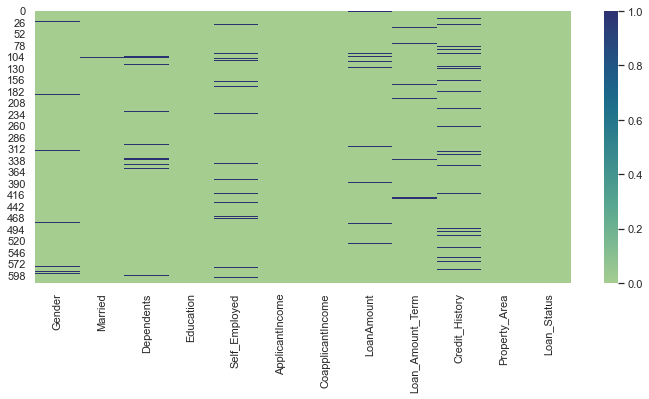

In [1680]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(loan.isnull(),cmap="crest")

### Observation:
    
Above heatmap shows null value present in the dataset

## Univariate Analysis

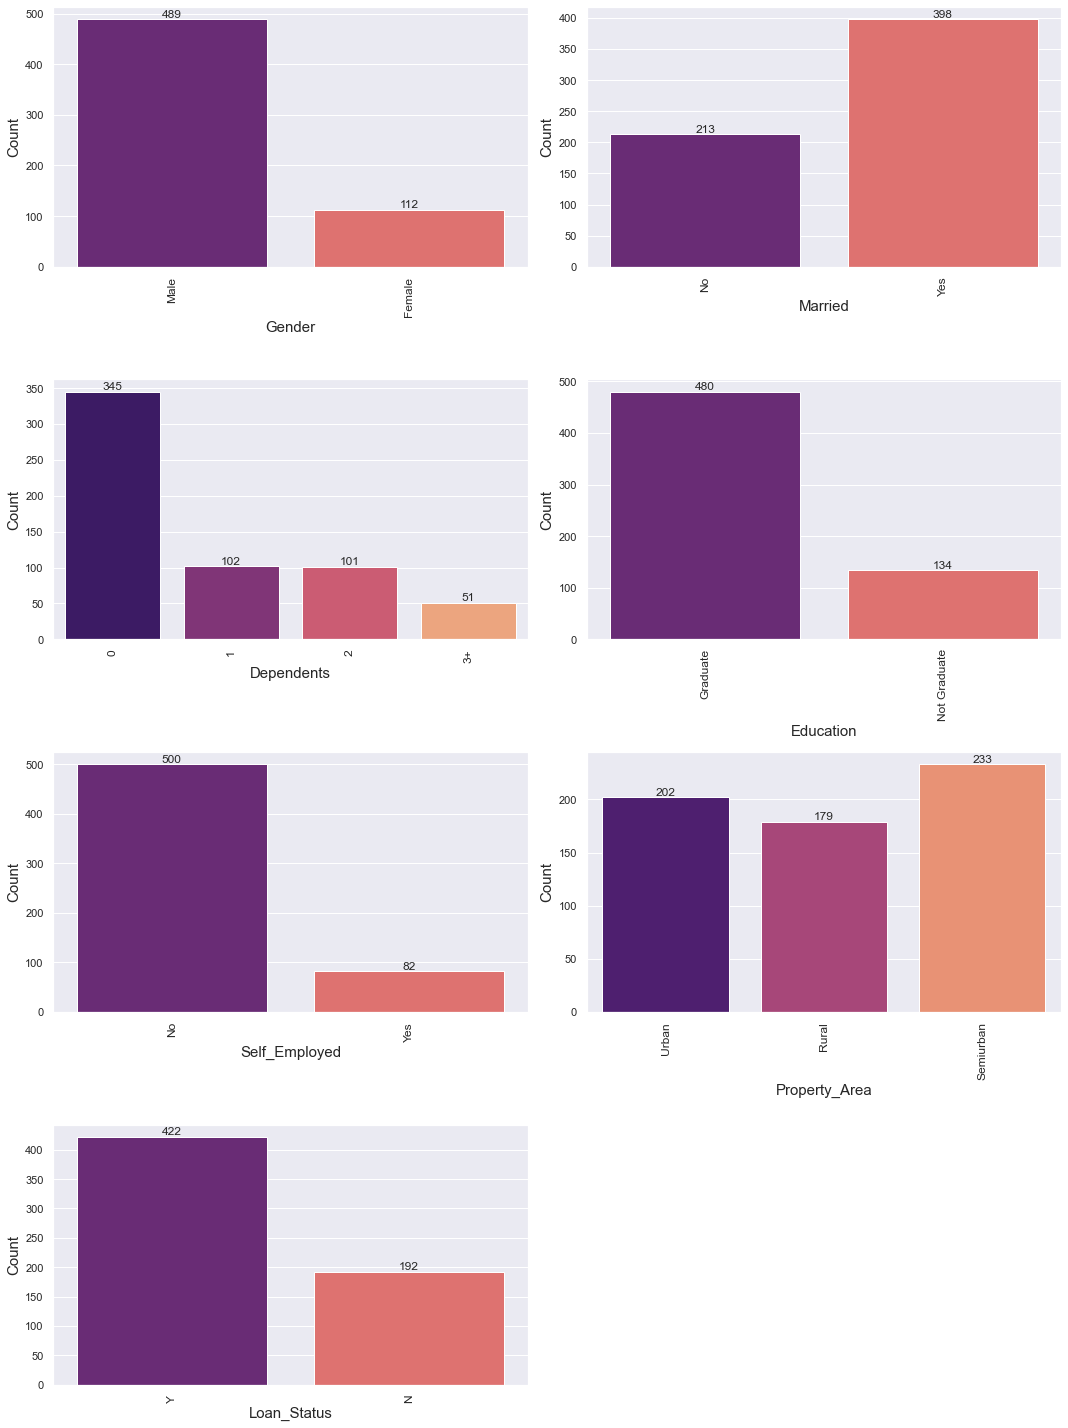

In [1681]:
# Visualizing categorical columns with 'countplot'

plt.figure(figsize=(15,20))
plot_number=1
for i in loan_cat:
    if plot_number <=7:
        ax=plt.subplot(4,2,plot_number)
        sns.countplot(loan[i],palette="magma")
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=12,rotation=90)
        plt.ylabel('Count',fontsize=15)
    plot_number+=1
    for i in ax.containers:
        ax.bar_label(i,fontsize=12)    
plt.tight_layout()

### Observations

Based on Gender, Male count is higher than Female and Married people are higher than Unmarried 
people

People with no Dependents are maximum followed by people with 1 and 2 dependents

In education, people with graduate are higher

People working for oneself as a freelancer or the owner of a business rather than for an employer are less when compared with an employer, as the employer count is high

People living in Semi-urban are high when compared with Urban and Rural

Based on loan status 422 applicants are eligible for loan and 192 applicants are not eligible

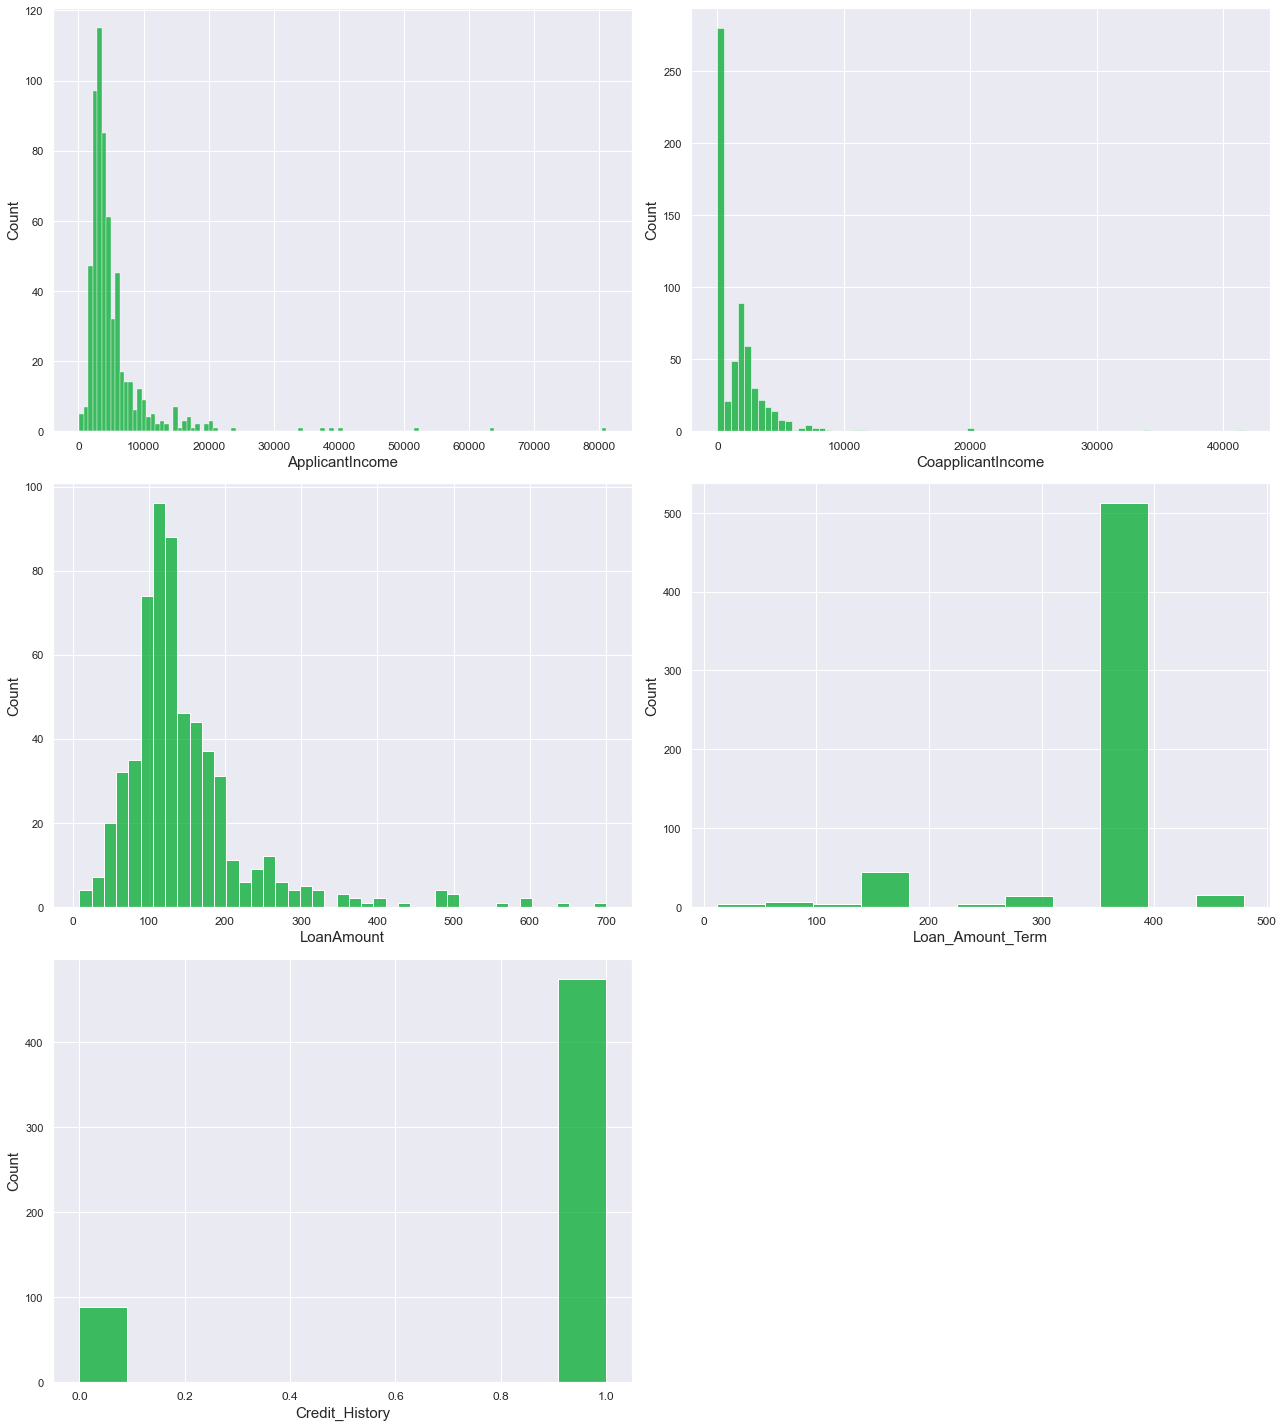

In [1682]:
# Visualizing numerical columns with 'histplot'

plt.figure(figsize=(18,20))
plot_number=1
for i in loan_num:
    if plot_number <=5:
        ax=plt.subplot(3,2,plot_number)
        sns.histplot(loan[i],color="#02ab2e")
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=12)
        plt.ylabel('Count',fontsize=15)
    plot_number+=1
plt.tight_layout()

### Observations

Maximum count of Applicant income ranges between 2000 to 10000 and Co-applicant income ranges between 1000 to 5000

Maximum loan amount an applicant owe ranges between 50 to 200

360 is the maximum loan-amount term availed to the applicant

If we look into Credit-History maximum people have demonstrated responsibility in repaying the loan


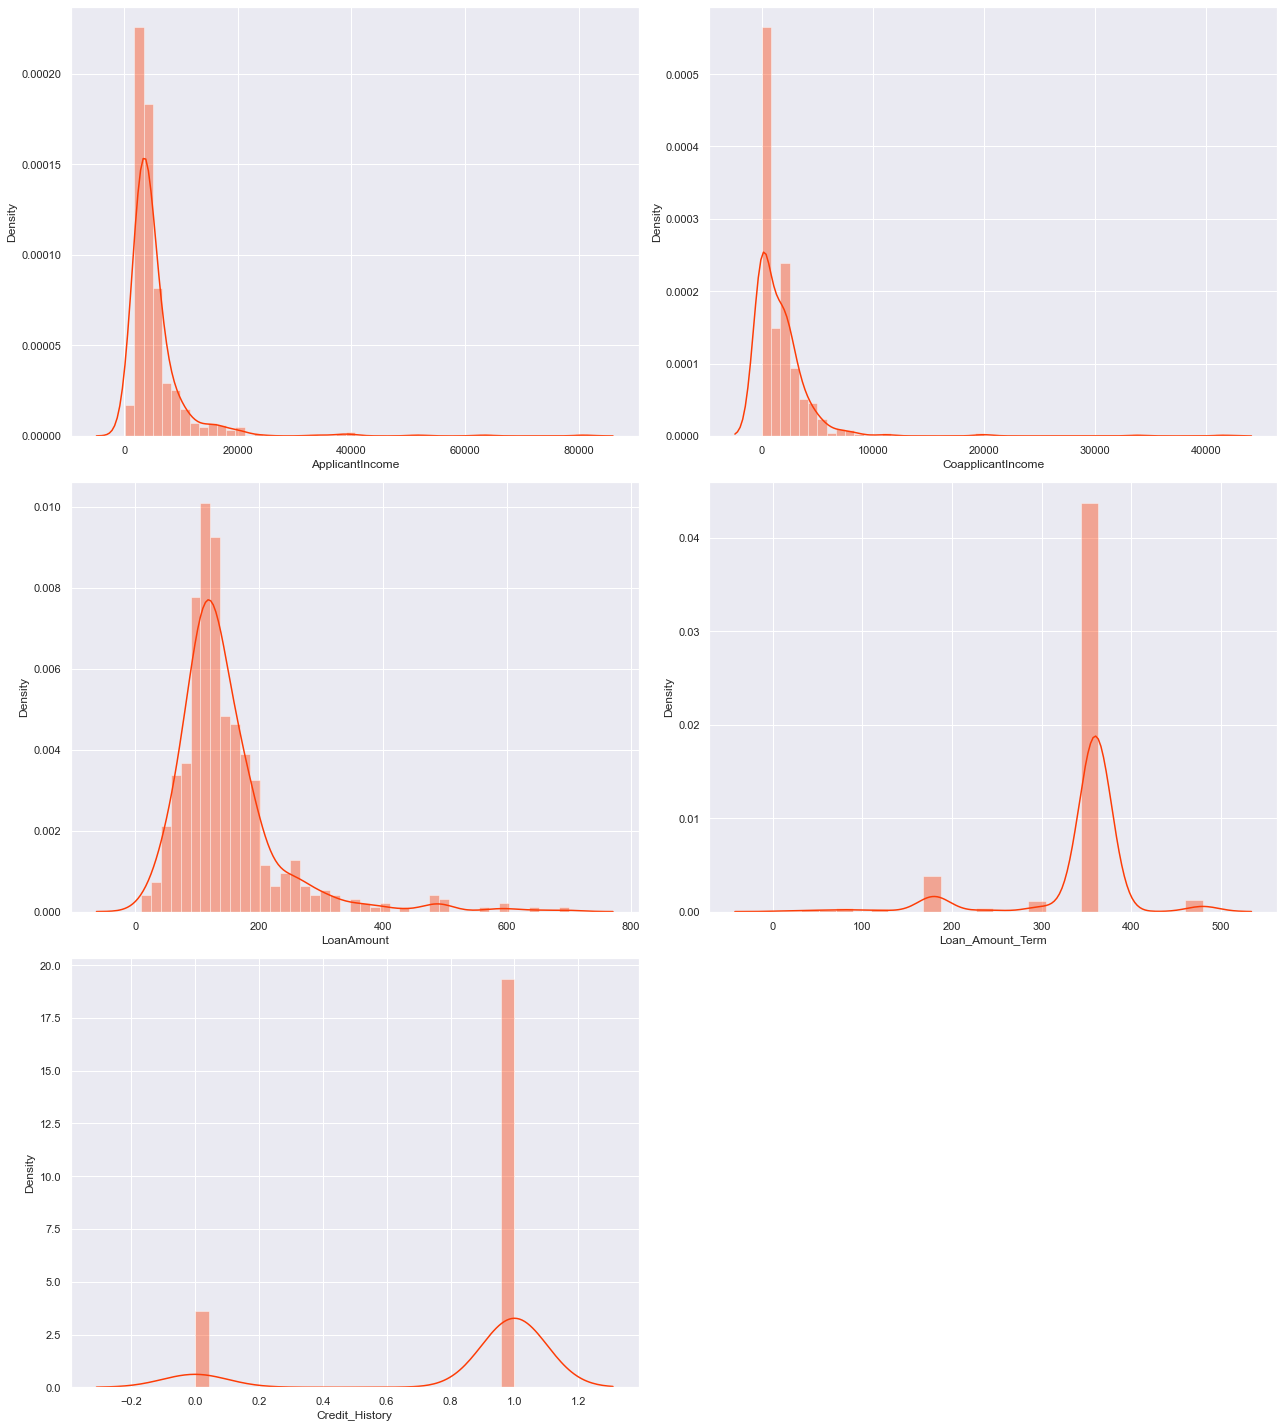

In [1683]:
# Visualizing the dataset with distribution plot to check the distribution befor replacing null values

plt.figure(figsize=(18,20))
plot_number=1
for i in loan_num:
    if plot_number <=5:
        ax=plt.subplot(3,2,plot_number)
        sns.distplot(loan[i],color="#fd3c06")
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Density',fontsize=12)
        plot_number+=1
        plt.tight_layout(pad=2.0)
plt.tight_layout()

### Observations

Based on distribution plot we can observe Applicant income, Coapplicant income and loan amount are skewed towards right

Loan-Term and Credit_history are skewed towards left

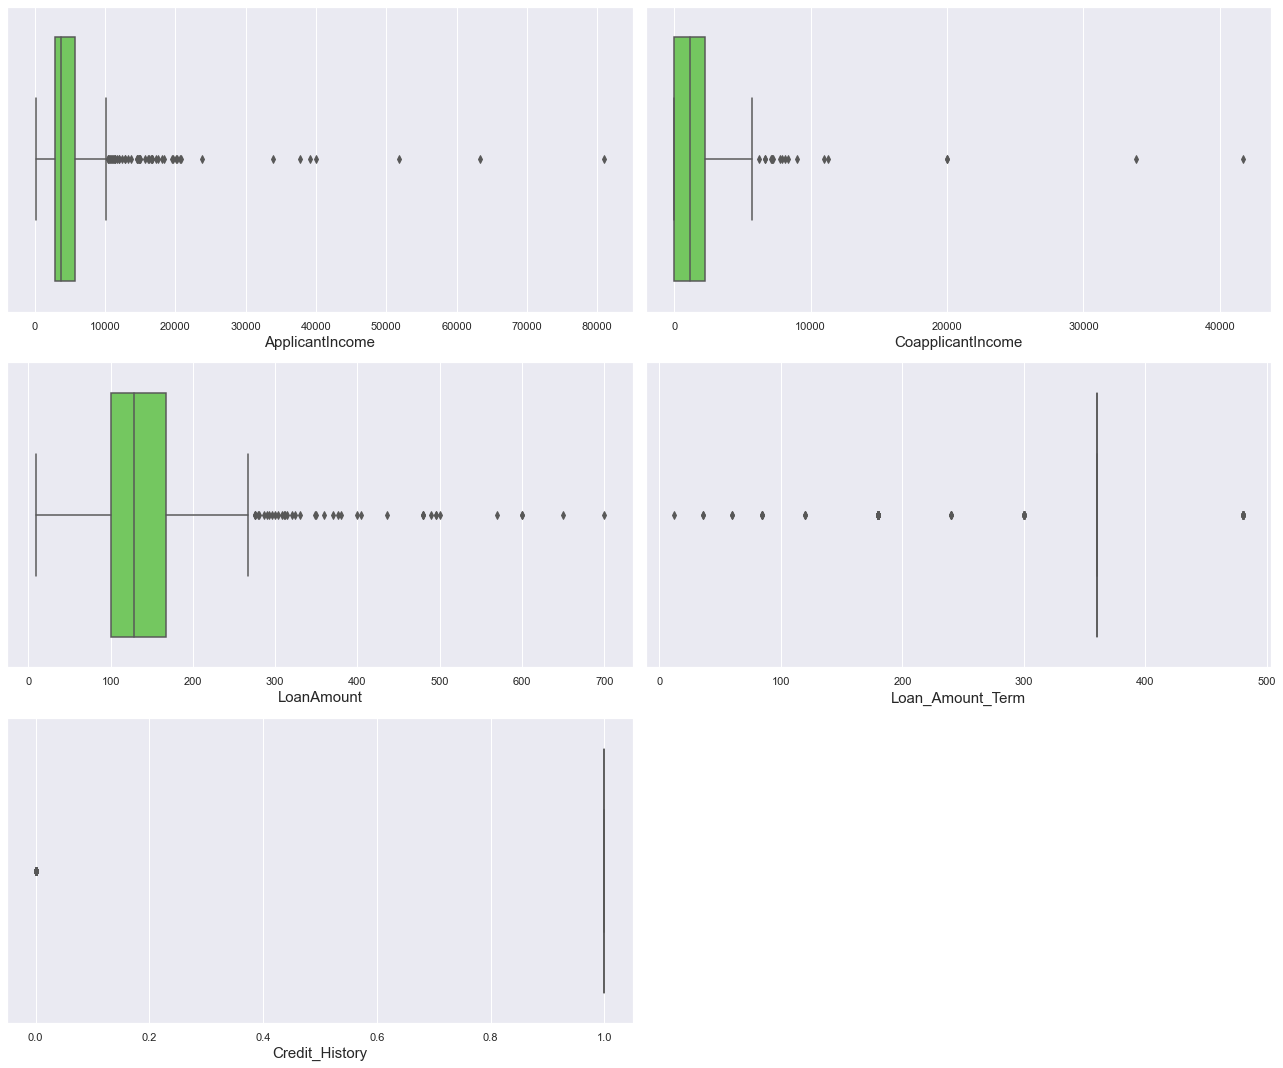

In [1684]:
# Checking outliers with boxplot

plt.figure(figsize=(18,15))
plot_number=1
for i in loan_num:
    if plot_number <=5:
        ax=plt.subplot(3,2,plot_number)
        sns.boxplot( loan[i],color='#69d84f')
        plt.xlabel(i,fontsize=15)
    plot_number+=1
plt.tight_layout()

### Observations

Above boxplot shows outliers are present in the features 'ApplicantIncome','CoapplicantIncome','LoanAmount',
'Loan_Amount_Term' and 'Credit_History'

## Bivariate and Multivariate Analysis

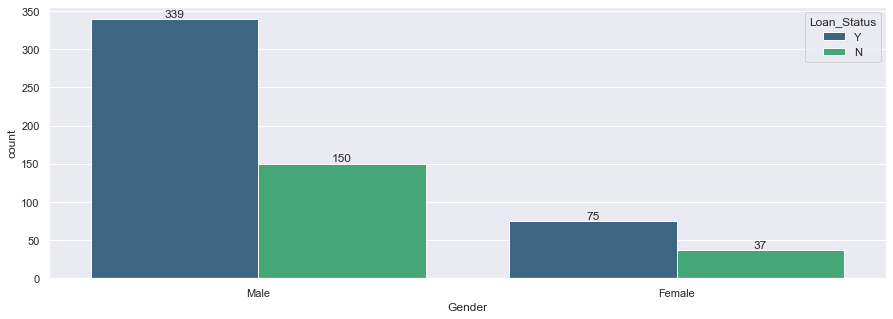

In [1685]:
# Visualizing Gender Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Gender"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Gender',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12) 

### Observations

If we compare Gender Vs Loan_Status, we can observe Male count is maximum who are eligible for loan compared with Female

Also same trend we can see in the category for not eligible for loan

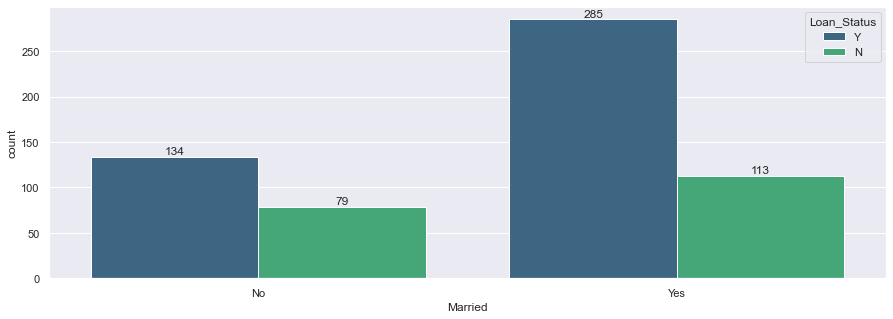

In [1686]:
# Visualizing Married Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Married"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Married',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12) 

### Observations

Married applicants are maximum eligible for availing loan when compared with Unmarried applicants

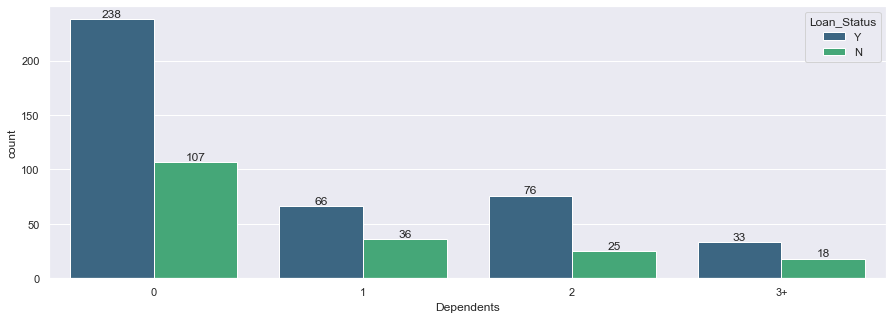

In [1687]:
# Visualizing Dependents Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Dependents"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Dependents',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12) 

### Observations

Applicants with no dependents are maximum eligible to avail loan, followed by applicants with 2 and 1 dependents

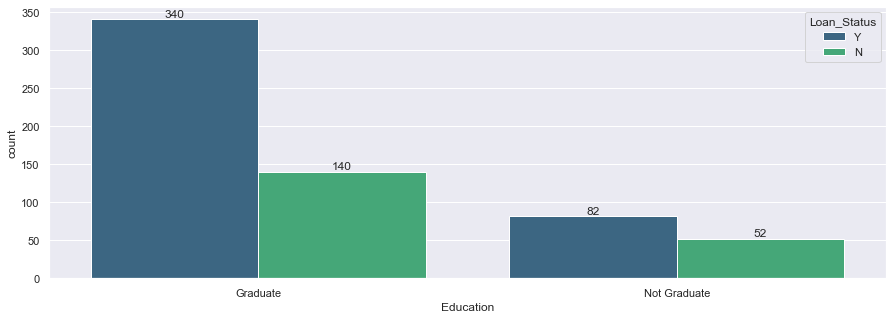

In [1688]:
# Visualizing Education Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Education"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Education',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12)

### Observations

Based on education we can clearly see, loans are availed maximum by gradute

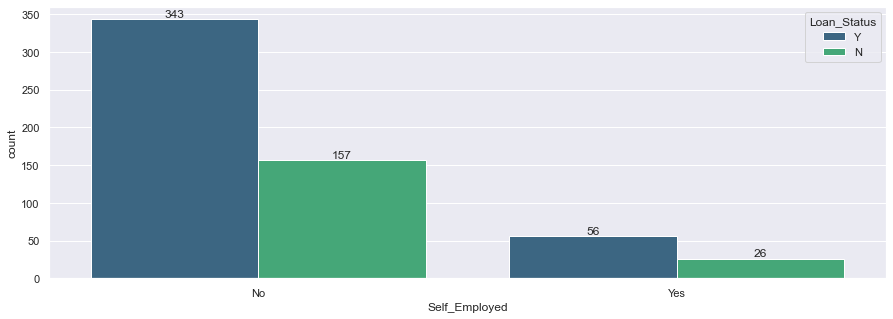

In [1689]:
# Visualizing Self_Employed Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Self_Employed"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Self_Employed',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12)

### Observations

Applicants who are employed are maximum in availing loan rather than self employed people 

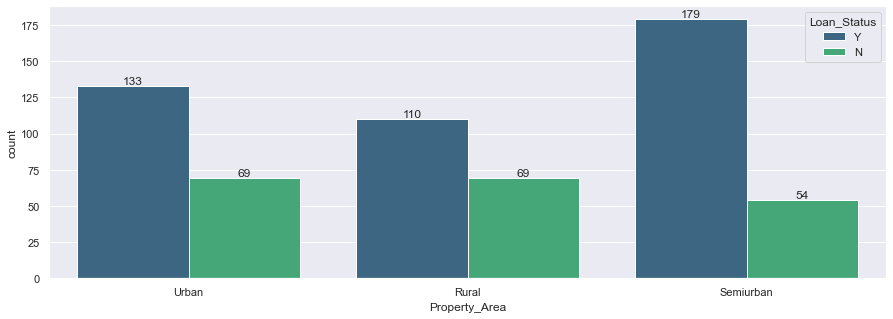

In [1690]:
# Visualizing Property_Area Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Property_Area"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Property_Area',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12)

### Observations

Based on property, Maximum people in Semi-Urban have availed loan, followed by Urban and Rural

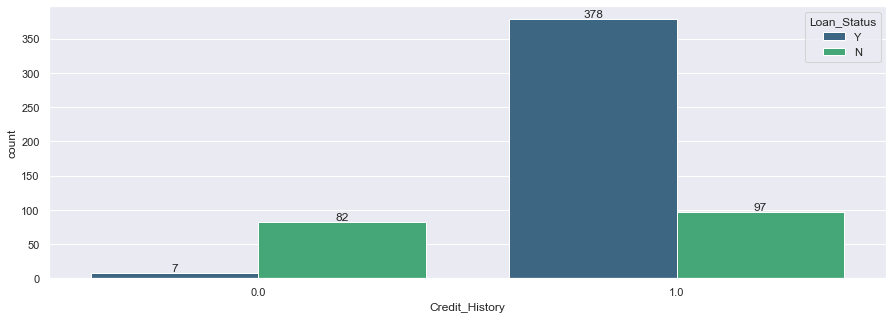

In [1691]:
# Visualizing Credit_History Vs Loan_Status using catplot

plt.figure(figsize=(15,5))
ax=sns.countplot(loan["Credit_History"],hue=loan["Loan_Status"],palette="viridis")
plt.xlabel('Credit_History',fontsize=12)
for i in ax.containers:
        ax.bar_label(i,fontsize=12)

### Observations:

If we look into Cred-History maximum people have demonstrated responsibility in repaying the loan

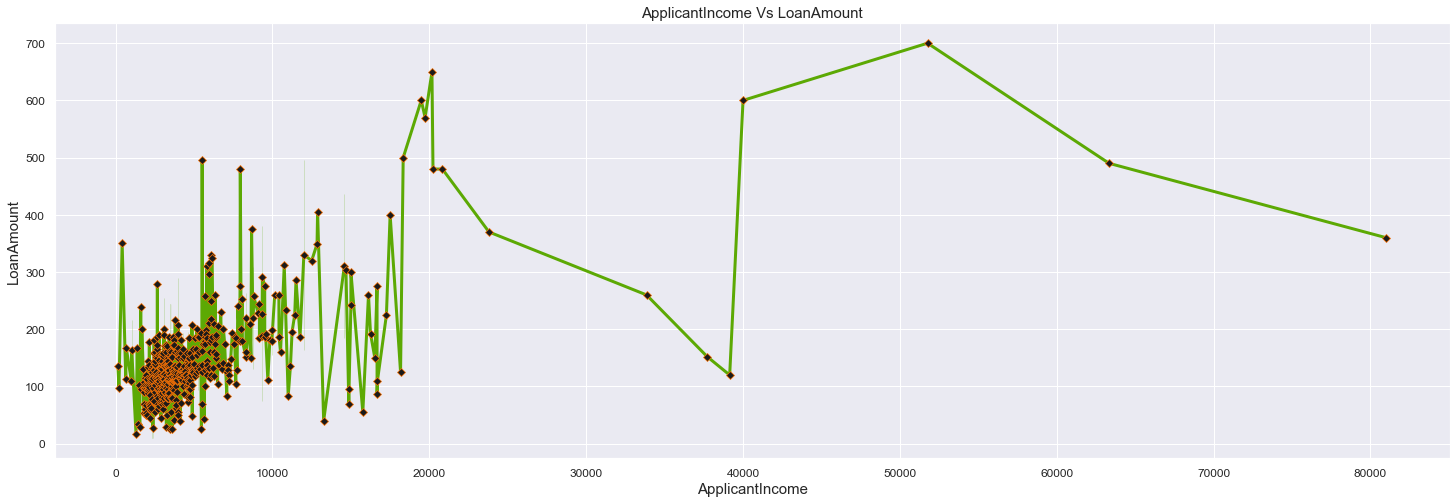

In [1692]:
# Comparing Year wise ApplicantIncome Vs LoanAmount

plt.figure(figsize=(25,8))
sns.lineplot(data =loan,x='ApplicantIncome',y='LoanAmount',color="#5ca904",
            linestyle = 'solid',linewidth=3,marker="D",markersize=6,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('ApplicantIncome',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('LoanAmount',fontsize=15)
plt.yticks(fontsize=12)
plt.title('ApplicantIncome Vs LoanAmount',fontsize=15)
plt.show()

### Observations

Maximum loant amount availed ranges between 50 to 200 by Applicants who have income ranges between 2000 to 10000

We can also observe, applicants who have high income have availed high loan amounts

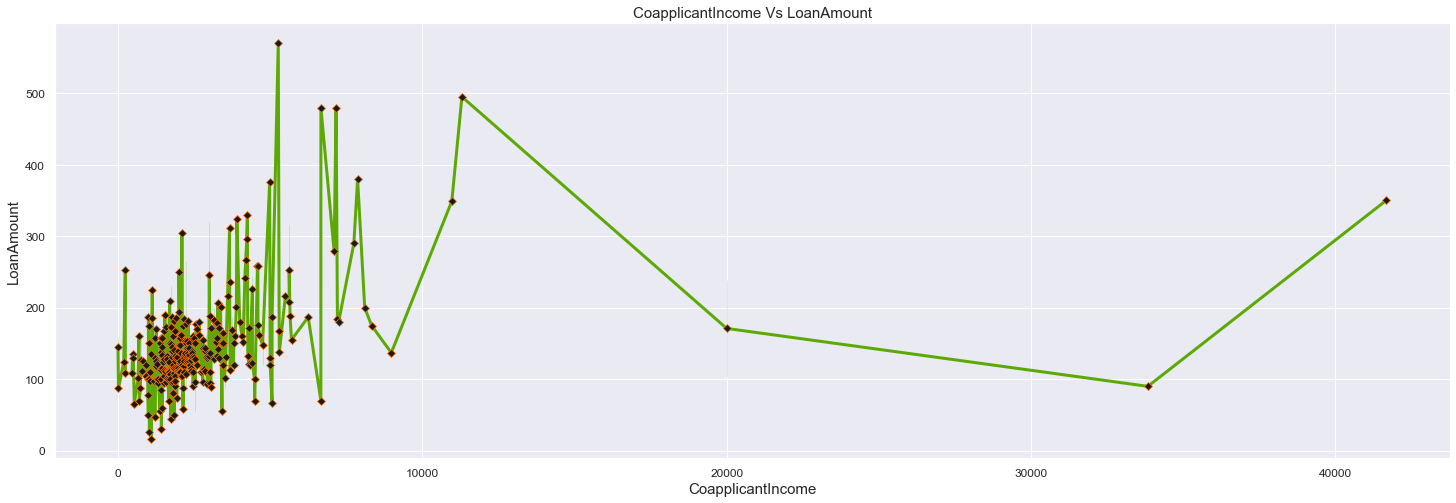

In [1693]:
# Comparing Year wise CoapplicantIncome Vs LoanAmount

plt.figure(figsize=(25,8))
sns.lineplot(data =loan,x='CoapplicantIncome',y='LoanAmount',color="#5ca904",
            linestyle = 'solid',linewidth=3,marker="D",markersize=6,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('CoapplicantIncome',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('LoanAmount',fontsize=15)
plt.yticks(fontsize=12)
plt.title('CoapplicantIncome Vs LoanAmount',fontsize=15)
plt.show()

### Observations

Co-applicant numbers are in sync with applicants, as we can observe Co-applicant who have income ranges between 1000 to 5000 are maximum who availed loan amount between
50 to 200

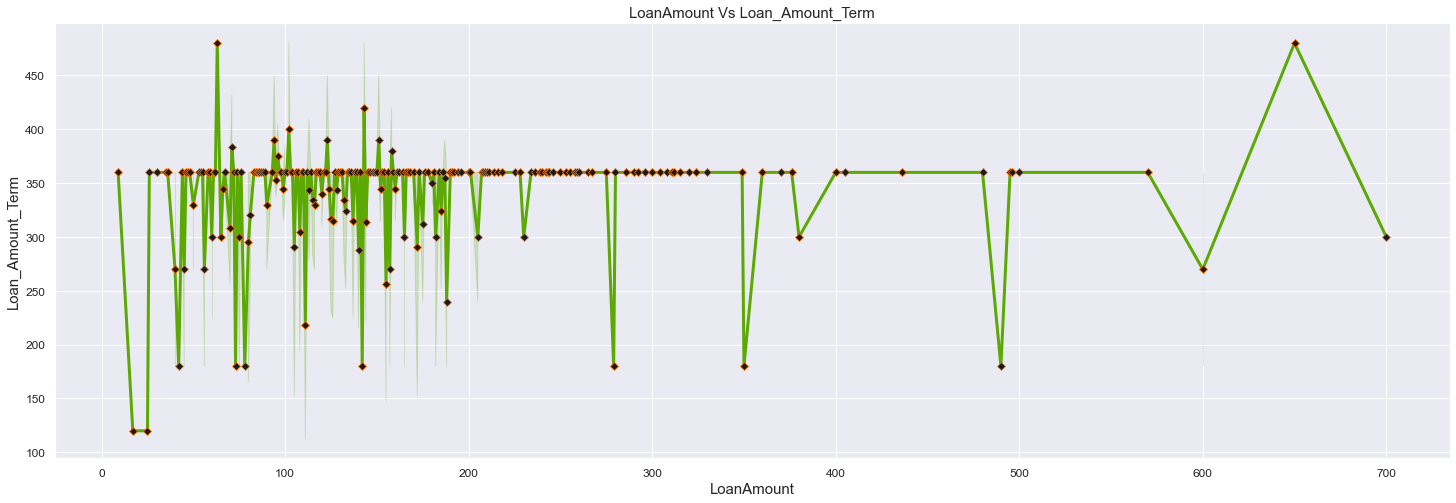

In [1694]:
# Comparing Year wise LoanAmount Vs Loan_Amount_Term

plt.figure(figsize=(25,8))
sns.lineplot(data =loan,x='LoanAmount',y='Loan_Amount_Term',color="#5ca904",
            linestyle = 'solid',linewidth=3,marker="D",markersize=6,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('LoanAmount',fontsize=15)
plt.xticks(fontsize=12)
plt.ylabel('Loan_Amount_Term',fontsize=15)
plt.yticks(fontsize=12)
plt.title('LoanAmount Vs Loan_Amount_Term',fontsize=15)
plt.show()

### Observations

Maximum Loan_Amount_Term given to the applicant is 360, as we can see applicants who are eligible for loan amount from 
50 to almost 600 have taken loan_amount term as 360


## Data Feature Selection and Engineering

### Replacing NAN and Null values with fillna

In [1695]:
# Checking the null values present in the dataset

loan.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1696]:
# Replacing Null values with mode by fillna

loan['Gender'].fillna(loan['Gender'].mode()[0],inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0],inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0],inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0],inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0],inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0],inplace=True)

In [1697]:
# Replacing Null values with mean by fillna

loan['LoanAmount'].fillna(loan['LoanAmount'].mean(),inplace=True)

In [1698]:
# Checking the null values after replacing NaN values 

loan.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

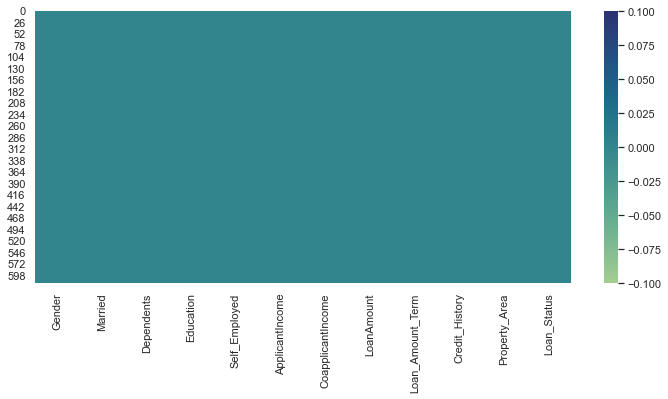

In [1699]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(loan.isnull(),cmap="crest")

### Observations

Above heatmap shows there are no null values present in the dataset

Features with null values have been replaced by fillna method

Null values present in the features Gender, Married,Dependents,Self_Employed,Credit_History and Loan_Amount_Term are replaced 
with mode and LoanAmount with mean

## Label Encoding

In [1700]:
# Label encoding categorical columns


from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
for i in loan.columns:
    if(loan[i].dtypes=='object'):
        loan[i]=le.fit_transform(loan[i].values.reshape(-1,1))

In [1701]:
loan.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1


### Observations

Label Encoding has been applied to categorical features Gender, Married, Dependents, Education, Self_Employed, Property_Area and Loan_Status to convert them into numerical for further analysis and Model Evaluation

## Describe - Statistical Summary

In [1703]:
loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


### Observations

Count is same across all the columns stating no missing value

Also we can see the difference between 75% to max are high in numerical columns which shows the presence of outliers in
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History

## Correlation Analysis

<AxesSubplot:>

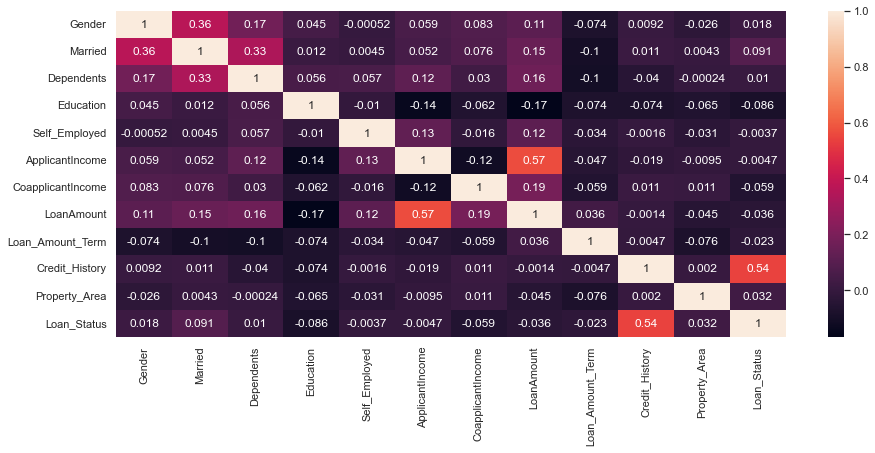

In [1704]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(15,6))
sns.heatmap(loan.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

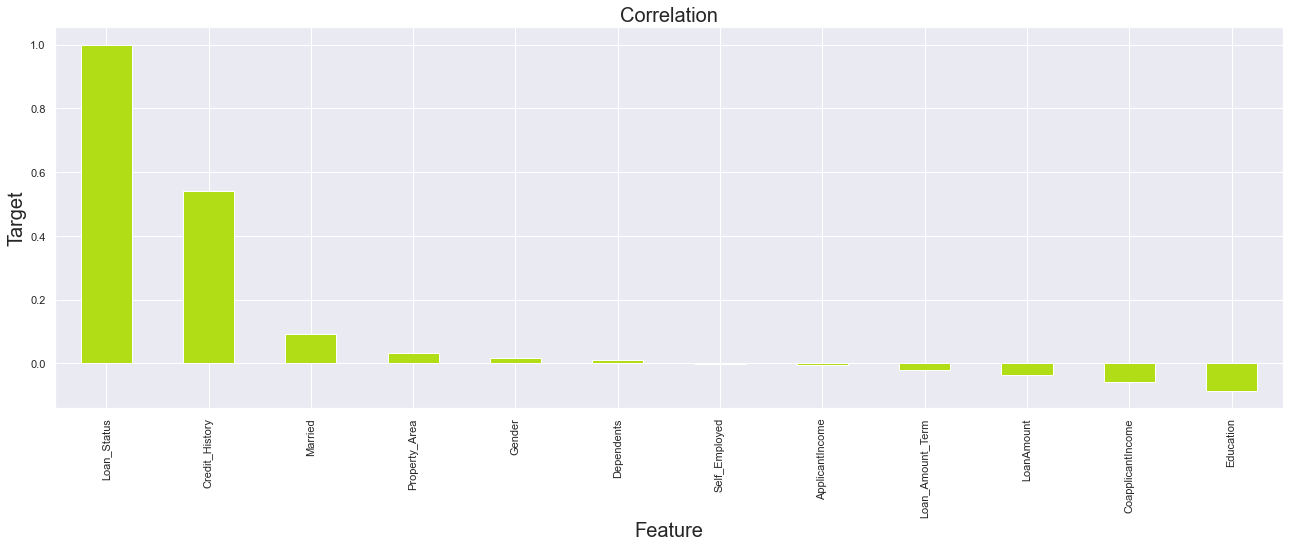

In [1705]:
# Checking Correlation of the input attributes with the Target variable 'capacity_mw' by Bar Plot

plt.figure(figsize=(22,7))
loan.corr()['Loan_Status'].sort_values(ascending=False).plot(kind='bar',color='#b0dd16')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [1706]:
loan.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

### Observations

Education, CoapplicantIncome, LoanAmount, Loan_Amount_Term, ApplicantIncome and Self_Employed are negatively correlated with
target variable Loan_Status

Dependents, Gender, Property_Area, Married, Credit_History are positively correlated with target variable

Education is highly negatively correlated with Applicantincome and loanAmount

## Outliers Treatment with Zscore

In [1707]:
# Removing outliers with zscore 

from scipy.stats import zscore

col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
z1 = loan[col]
z1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0


In [1708]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
       2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
      dtype=int64))


In [1709]:
loan_new = loan[(z<3).all(axis=1)]

In [1710]:
loan.shape

(614, 12)

In [1711]:
loan_new.shape

(577, 12)

In [1712]:
# Checking the dataloss

dataloss = (614-577)/614*100
dataloss

6.026058631921824

### Observations

After applying z score to remove outliers, data loss is at 6.02% which is in acceptable range

## Skewness

In [1713]:
# Checking skewness

loan_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [1714]:
# Applying log transformation method for numerical features

loan['CoapplicantIncome']= np.log(loan['CoapplicantIncome'])
loan['LoanAmount']= np.log(loan['LoanAmount'])
loan['ApplicantIncome']= np.log(loan['ApplicantIncome'])
loan['Loan_Amount_Term']= np.sqrt(loan['Loan_Amount_Term'])
loan['Credit_History']= np.sqrt(loan['Credit_History'])

In [1715]:
# Checking skewness after applying log transformation method

loan_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [1716]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['LoanAmount','CoapplicantIncome','ApplicantIncome','Loan_Amount_Term','Credit_History']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
loan_new[skew] = pt.fit_transform(loan_new[skew].values)

In [1717]:
# Checking skewness

loan_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.727533
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

### Observations

Applied log transformation and yea-johnson method for numerical features and we can observe skewness reduced in those features
apart from Credit-History, hence keeping the threshold of skewness to +/-1.97 for numerical features 

## Variance Inflation Factor

In [1718]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = loan_new.drop("Loan_Status",axis=1)
x.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
288,0,0,0,0,0,10.629890,0.000000,11.932525,1.681817e+07,80.55264,1
373,1,0,1,0,0,10.157390,10.322187,11.755335,2.101446e+06,0.00000,2
142,1,0,0,0,1,11.477610,0.000000,14.208606,2.101446e+06,80.55264,1
161,1,1,0,0,0,11.696492,0.000000,17.057719,1.681817e+07,80.55264,2
40,1,0,0,0,0,10.413259,0.000000,10.215735,1.681817e+07,80.55264,2


In [1719]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor           Features
0     6.587399             Gender
1     4.048968            Married
2     1.776023         Dependents
3     1.307448          Education
4     1.186890      Self_Employed
5    64.946509    ApplicantIncome
6     3.020556  CoapplicantIncome
7    52.351438         LoanAmount
8     9.183234   Loan_Amount_Term
9     6.641563     Credit_History
10    2.711333      Property_Area


In [1720]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['LoanAmount','ApplicantIncome']
st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
440,1,0,0,0,0,-0.171903,12.063193,0.961555,1.681817e+07,80.55264,1
24,1,1,1,0,0,-0.144123,11.026528,0.394493,1.681817e+07,80.55264,1
573,1,1,2,1,0,0.766973,9.964096,0.961555,3.992653e+07,80.55264,1
175,1,1,0,0,0,-0.253658,10.301304,-0.249378,1.681817e+07,80.55264,0
378,1,0,0,0,0,-0.486774,0.000000,-1.301481,3.992653e+07,80.55264,2


In [1721]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor           Features
0     5.827032             Gender
1     3.993356            Married
2     1.771147         Dependents
3     1.338420          Education
4     1.186763      Self_Employed
5     1.725571    ApplicantIncome
6     3.476733  CoapplicantIncome
7     1.506007         LoanAmount
8     5.628707   Loan_Amount_Term
9     5.293465     Credit_History
10    2.522411      Property_Area


### Observations

VIF is high in features 'LoanAmount' and 'ApplicantIncome' 

Applied scaling method to standardize the features and VIF has been reduced under the threshold of 10

## Applying SMOTE Technique

In [1722]:
#Splitting the features to x and y
    
x.shape

(577, 11)

In [1723]:
y = loan_new['Loan_Status']
y.shape

(577,)

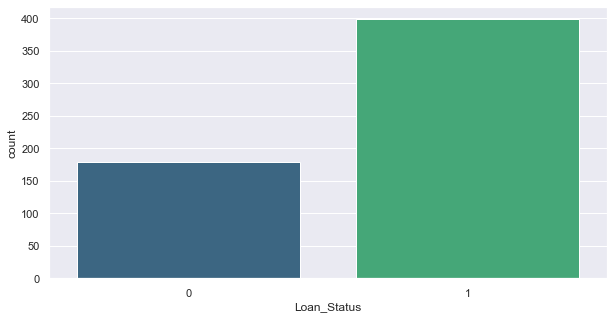

In [1724]:
# Checking the count of feature 'Loan_Status' 

plt.figure(figsize=(10,5))
sns.countplot(y,palette='viridis')
for i in sx.containers:
    sx.bar_label(i,fontsize=12)

Above countplot shows the classes are imbalanced, hence applying SMOTE technique to balance the classes

In [1725]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [1726]:
# Applying SMOTE technique 

smt = SMOTE()

x2,y2 = smt.fit_resample(x1,y)

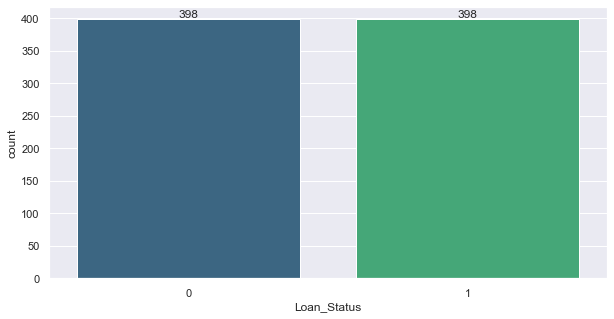

In [1727]:
# Checking the count of feature 'Loan_Status' after applying 'SMOTE'

plt.figure(figsize=(10,5))
sx=sns.countplot(y2,palette='viridis')
for i in sx.containers:
    sx.bar_label(i,fontsize=12)

### Observations

Classes are imbalanced in target variable Loan_Status

Applied SMOTE technique to balance the Target Variable Loan_Status

Above countplot shows target variable is equal in all the category

# Model Evaluation

In [1728]:
# Checking the dimension of the data 

x2.shape

(796, 11)

In [1729]:
# Checking the dimension of the data 

y2.shape

(796,)

In [1730]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [1765]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x2_train,y2_train)
    predrf = rf.predict(x2_test)
    acc = accuracy_score(y2_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 89.1213389121339 on Random State 4


## Train and Split

In [1766]:
# Training the Model with .30 as test size and random state at 4

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30, random_state=4)

In [1767]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [1768]:
GB = GaussianNB()
GB.fit(x2_train,y2_train)
print(GB.score(x2_train,y2_train))
GB_predict = GB.predict(x2_test)
cr1 = cross_val_score(GB,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))

0.7289048473967684
Accuracy Score: 71.54811715481172
CV score of GaussianNB: 72.36635220125785
[[ 60  66]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.97      0.48      0.64       126
           1       0.63      0.98      0.77       113

    accuracy                           0.72       239
   macro avg       0.80      0.73      0.70       239
weighted avg       0.81      0.72      0.70       239



## LogisticRegression

In [1769]:
LR = LogisticRegression()
LR.fit(x2_train,y2_train)
print(LR.score(x2_train,y2_train))
LR_predict = LR.predict(x2_test)
cr10 = cross_val_score(LR,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr10.mean()*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))

0.7360861759425493
Accuracy Score: 71.1297071129707
CV score of LogisticRegression: 71.35927672955974
[[ 64  62]
 [  7 106]]
              precision    recall  f1-score   support

           0       0.90      0.51      0.65       126
           1       0.63      0.94      0.75       113

    accuracy                           0.71       239
   macro avg       0.77      0.72      0.70       239
weighted avg       0.77      0.71      0.70       239



## SVC

In [1770]:
SV = SVC()
SV.fit(x2_train,y2_train)
print(SV.score(x2_train,y2_train))
SV_predict = SV.predict(x2_test)
cr2 = cross_val_score(SV,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,SV_predict)*100)
print('CV score of SVC:',cr2.mean()*100)
print(confusion_matrix(y2_test,SV_predict))
print(classification_report(y2_test,SV_predict))

0.7450628366247756
Accuracy Score: 72.80334728033473
CV score of SVC: 73.1187106918239
[[ 66  60]
 [  5 108]]
              precision    recall  f1-score   support

           0       0.93      0.52      0.67       126
           1       0.64      0.96      0.77       113

    accuracy                           0.73       239
   macro avg       0.79      0.74      0.72       239
weighted avg       0.79      0.73      0.72       239



## RandomForestClassifier

In [1771]:
RFC = RandomForestClassifier()
RFC.fit(x2_train,y2_train)
print(RFC.score(x2_train,y2_train))
RFC_predict = RFC.predict(x2_test)
cr3 = cross_val_score(RFC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr3.mean()*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))

1.0
Accuracy Score: 86.19246861924687
CV score of RandomForestClassifier: 81.28930817610062
[[103  23]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       126
           1       0.82      0.91      0.86       113

    accuracy                           0.86       239
   macro avg       0.86      0.86      0.86       239
weighted avg       0.87      0.86      0.86       239



## DecisionTreeClassifier

In [1772]:
DTC = DecisionTreeClassifier()
DTC.fit(x2_train,y2_train)
print(DTC.score(x2_train,y2_train))
DTC_predict = DTC.predict(x2_test)
cr4 = cross_val_score(DTC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr4.mean()*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))

1.0
Accuracy Score: 79.9163179916318
CV score of DecisionTreeClassifier: 75.00235849056604
[[103  23]
 [ 25  88]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       126
           1       0.79      0.78      0.79       113

    accuracy                           0.80       239
   macro avg       0.80      0.80      0.80       239
weighted avg       0.80      0.80      0.80       239



## KNeighborsClassifier

In [1773]:
KNC = KNeighborsClassifier()
KNC.fit(x2_train,y2_train)
print(KNC.score(x2_train,y2_train))
KNC_predict = KNC.predict(x2_test)
cr5 = cross_val_score(KNC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr5.mean()*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))

0.8276481149012568
Accuracy Score: 75.73221757322176
CV score of KNeighborsClassifier: 75.00471698113206
[[96 30]
 [28 85]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.77       126
           1       0.74      0.75      0.75       113

    accuracy                           0.76       239
   macro avg       0.76      0.76      0.76       239
weighted avg       0.76      0.76      0.76       239



## GradientBoostingClassifier

In [1774]:
GBC = GradientBoostingClassifier()
GBC.fit(x2_train,y2_train)
print(GBC.score(x2_train,y2_train))
GBC_predict = GBC.predict(x2_test)
cr6 = cross_val_score(GBC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr6.mean()*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))

0.9066427289048474
Accuracy Score: 80.3347280334728
CV score of GradientBoostingClassifier: 75.76100628930818
[[ 88  38]
 [  9 104]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79       126
           1       0.73      0.92      0.82       113

    accuracy                           0.80       239
   macro avg       0.82      0.81      0.80       239
weighted avg       0.82      0.80      0.80       239



## AdaBoostClassifier

In [1775]:
ABC = AdaBoostClassifier()
ABC.fit(x2_train,y2_train)
print(ABC.score(x2_train,y2_train))
ABC_predict = ABC.predict(x2_test)
cr7 = cross_val_score(ABC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr7.mean()*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))

0.8240574506283662
Accuracy Score: 78.66108786610879
CV score of AdaBoostClassifier: 73.25078616352204
[[ 85  41]
 [ 10 103]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.77       126
           1       0.72      0.91      0.80       113

    accuracy                           0.79       239
   macro avg       0.81      0.79      0.79       239
weighted avg       0.81      0.79      0.78       239



## BaggingClassifier

In [1778]:
BC = BaggingClassifier()
BC.fit(x2_train,y2_train)
print(BC.score(x2_train,y2_train))
BC_predict = BC.predict(x2_test)
cr8 = cross_val_score(BC,x2,y2,cv=5)

    
print('Accuracy Score:',accuracy_score(y2_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr8.mean()*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))

0.9856373429084381
Accuracy Score: 83.68200836820083
CV score of BaggingClassifier: 76.63757861635222
[[107  19]
 [ 20  93]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       126
           1       0.83      0.82      0.83       113

    accuracy                           0.84       239
   macro avg       0.84      0.84      0.84       239
weighted avg       0.84      0.84      0.84       239



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [1779]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

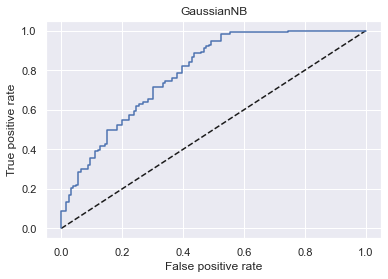

0.7292456805731142

In [1780]:
# Checking roc_auc_score for GaussianNB

y_pred_prob = GB.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score = roc_auc_score(y2_test,GB.predict(x2_test))
auc_score

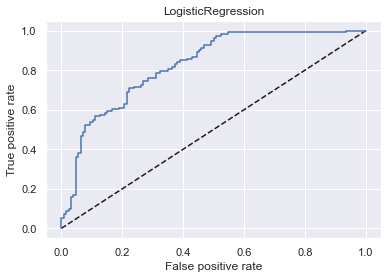

0.7229948026408204

In [1781]:
# Checking roc_auc_score for LogisticRegression

y_pred_prob = LR.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
auc_score = roc_auc_score(y2_test,LR.predict(x2_test))
auc_score

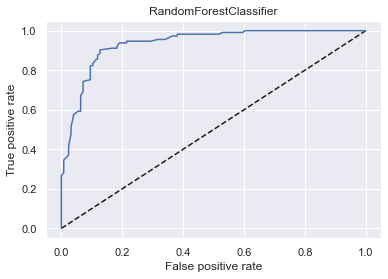

0.8644823711195392

In [1782]:
# Checking roc_auc_score for RandomForestClassifier

y_pred_prob = RFC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,RFC.predict(x2_test))
auc_score

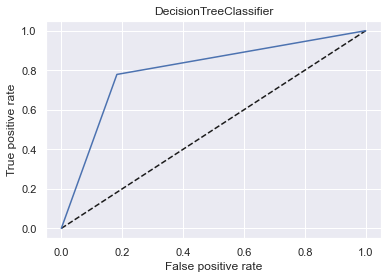

0.79811068970361

In [1783]:
# Checking roc_auc_score for DecisionTreeClassifier

y_pred_prob = DTC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,DTC.predict(x2_test))
auc_score

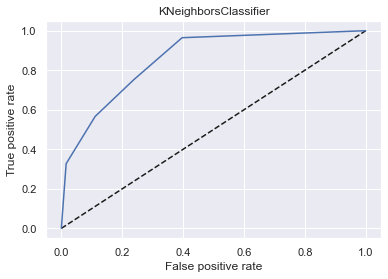

0.7570585756426464

In [1784]:
# Checking roc_auc_score for KNeighborsClassifier

y_pred_prob = KNC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,KNC.predict(x2_test))
auc_score

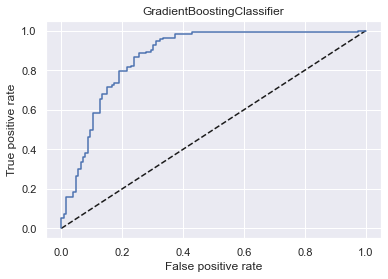

0.8093833403567916

In [1785]:
# Checking roc_auc_score for GradientBoostingClassifier

y_pred_prob = GBC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,GBC.predict(x2_test))
auc_score

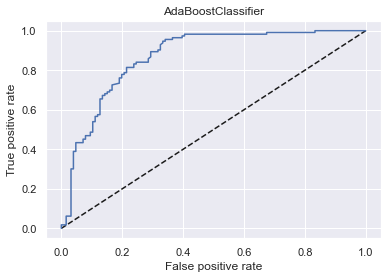

0.7930537996909678

In [1786]:
# Checking roc_auc_score for AdaBoostClassifier

y_pred_prob = ABC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,ABC.predict(x2_test))
auc_score

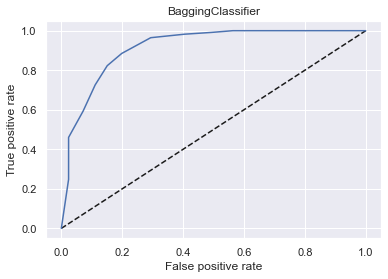

0.8361075993819356

In [1787]:
# Checking roc_auc_score for BaggingClassifier

y_pred_prob = BC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,BC.predict(x2_test))
auc_score

### Observations:

Based on Model Evaluation RandomForestClassifier is performing well with accuracy score of 86% with Cross validation score of 81% and AUC_ROC_Curve 86%, which is good compared with other Models

Let's proceed with Hyper Parameter Tuning to enhance the Model

## Hyper Parameter Tuning

In [1796]:
grid_params={'n_estimators':[100,150],'criterion':['gini','entropy','log_loss'],
            'max_depth':[50,100,150],'min_samples_split':[2,4,5,6],'min_samples_leaf': [1,2]}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 150],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150]})
Best Score 0.7773005148005148
Best Params {'criterion': 'entropy', 'max_depth': 150, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


# Final_Model

In [1809]:
# Applying only two parameters for Final Model for better performance

Final_Model = RandomForestClassifier(n_estimators =150,criterion = 'entropy',min_samples_split=2,max_depth=150,
                                    min_samples_leaf=1)
                                       
Final_Model.fit(x2_train,y2_train)
pred = Final_Model.predict(x2_test)
print(Final_Model.score(x2_train,y2_train))
cr22 = cross_val_score(Final_Model,x2,y2,cv=5)

print(accuracy_score(y2_test,pred)*100)
print('CV score of RandomForestClassifier:',cr22.mean()*100)
print(confusion_matrix(y2_test,pred))
print(classification_report(y2_test,pred))

1.0
88.70292887029288
CV score of RandomForestClassifier: 83.3003144654088
[[106  20]
 [  7 106]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       126
           1       0.84      0.94      0.89       113

    accuracy                           0.89       239
   macro avg       0.89      0.89      0.89       239
weighted avg       0.89      0.89      0.89       239



## AUC_ROC_CURVE - Final Model

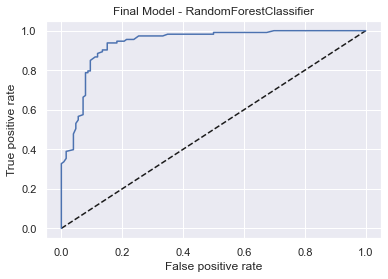

0.8896614693074871

In [1810]:
# Checking roc_auc_score for Final Model

y_pred_prob = Final_Model.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Final Model - RandomForestClassifier ')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Final Model - RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,Final_Model.predict(x2_test))
auc_score

### Observations:
    
Based on Accuracy Score 88% Vs Cross Validation Score 83% Vs AUC_ROC_Curve 88%, Random Forest Classifier is performing well.
Moreover below Classification report scores are better than other model

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       126
           1       0.84      0.94      0.89       113

    accuracy                           0.89       239
   macro avg       0.89      0.89      0.89       239
weighted avg       0.89      0.89      0.89       239

Concluding Random Forest Classifier Model is the best fit model for classification to predict the 'Loan_Status' for Loan Application Status Prediction dataset

## Saving the Final model - RandomForestClassifier

In [1811]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

## Predicting the Model

In [1812]:
# Loading the saved model

Model=joblib.load("Loan_Application_Status.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [1813]:
pd.DataFrame([Model.predict(x2_test)[:],y2_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,1,0
2,1,1
3,1,1
4,0,0
5,1,1
6,0,0
7,0,1
8,1,1
9,1,1


# Conclusion

Loan Application Status dataset contains 614 rows and 13 columns

When doing the data analysis we can find null values present in the dataset and they were replaced by imputation technique

In the dataset we can observe 

Maximum count of Applicant income ranges between 2000 to 10000 and Co-applicant income ranges between 1000 to 5000

Maximum loan amount an applicant owe ranges between 50 to 200 and 360 is the maximum loan-amount term availed to the applicant

If we look into Credit-History maximum people have demonstrated responsibility in repaying the loan 

Graduates and people who have been employed rather than self employed are maximum in availing loan

Classes are imbalanced in target variable Loan_Status, hence applied SMOTE technique to balance the Target Variable

Finally, 796 rows 11 columns were utilized for building classification Model to predict 'Loan_Status'

For Model Evaluation 70/30 is the train,test size used for evaluating the Model with random_state=4

Random Forest Classifier performs well with Accuracy Score 88% Vs Cross Validation Score 82% Vs AUC_ROC_Curve 88%
and it is the best fit model to predict 'Loan_Status' for Loan Application Status dataset 

Based on the Predicted Vs Original we can observe RandomForestClassifier is performing well and prediction is same with
original

Thank you for Providing the opportunity to work on the Loan Application Status dataset.
